Author: Daniel Abadjiev  
&nbsp;&nbsp;&nbsp; with lots of help from Eliza  
Date: June 3, 2025  
Description: a notebook to test some stuff with smartpixels data and get a handle on the data format/machine learning general things.   

Will partially follow Eliza's github, will also follow this tutorial https://www.tensorflow.org/tutorials/keras/classification

In [25]:
from OptimizedDataGenerator4 import *
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
# data_dir = "../smartpixML/MuonColliderSim/Simulation_Output/";
# tf_dir = "./tfRecDirDaniel"
# labels_dir = "./labelsDirDaniel" #leftover 
# dataFormatter = OptimizedDataGenerator(
#     tf_records_dir=tf_dir,
#     # data_directory_path=data_dir,
#     # file_type="parquet",
#     load_records=True,
#     muon_collider=True,
#     x_feature_description=['cluster','x_profile','x_size'],
#     batch_size=3000,
#     filteringBIB=True
#     )
# dataFormatter.tfrecord_filenames.size

In [27]:
# print(dataFormatter)
# # print(dataFormatter.x_features)
# print(dataFormatter.x_feature_description)
# # dataFormatter.x_features['x_profile']
# print(dataFormatter.x_features['x_size'])
# print(np.shape(dataFormatter.x_features['x_size']))
# print(dataFormatter.labels)
# # plt.plot(dataFormatter.labels)
# model.fit(x=dataFormatter.x_features['x_size'],y=dataFormatter.labels)

In [28]:
validation_dir = "./tf_records1000Daniel/tfrecords_validation/"
train_dir = "./tf_records1000Daniel/tfrecords_train/"
x_feature_description: list = ['x_size','z_global','y_profile','x_profile']
trainODG = OptimizedDataGenerator(tf_records_dir=train_dir,load_records=True, x_feature_description=x_feature_description)
validationODG = OptimizedDataGenerator(tf_records_dir=validation_dir,load_records=True, x_feature_description=x_feature_description)
# trainODG._parse_tfrecord_fn()

In [ ]:

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(None,1), name="z_global"),
    # tf.keras.layers.Input(shape=(13,), name="y_profile"),
    # tf.keras.layers.Dense(128,activation='relu'),
    # tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
callbacks=[]
learningRates = [0.1,0.9,0.6,0.3,0.1,0.03,0.01,0.001,0.0001,0.00001,0.000001]
callbacks.append(tf.keras.callbacks.LearningRateScheduler(lambda epoch,lr : lr if epoch<5 else lr*np.exp(-0.1)))
callbacks=[]
history = model.fit(x=trainODG,validation_data=validationODG, callbacks=callbacks,epochs=40)



Epoch 1/100


/home/dabadjiev/.local/lib/python3.9/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: z_global
Received: inputs=['Tensor(shape=(None, 1))']
  warnings.warn(msg)


60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - binary_accuracy: 0.5425 - loss: 0.7165 - val_binary_accuracy: 0.5452 - val_loss: 0.7085
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - binary_accuracy: 0.4609 - loss: 0.7192 - val_binary_accuracy: 0.5180 - val_loss: 0.7037
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - binary_accuracy: 0.5119 - loss: 0.7029 - val_binary_accuracy: 0.5034 - val_loss: 0.7003
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - binary_accuracy: 0.4411 - loss: 0.7042 - val_binary_accuracy: 0.5350 - val_loss: 0.6975
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - binary_accuracy: 0.3757 - loss: 0.7025 - val_binary_accuracy: 0.3855 - val_loss: 0.6952
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - binary_accuracy: 0.4829 - loss: 0.6949 - val_binary_accuracy: 0.6284 - val_loss: 0.6927
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - binary_accuracy: 0.5274 - loss: 0.6922 - val_binary_accuracy: 0.4573 - val_loss: 0.6913
Epoch 8/100
60/60 

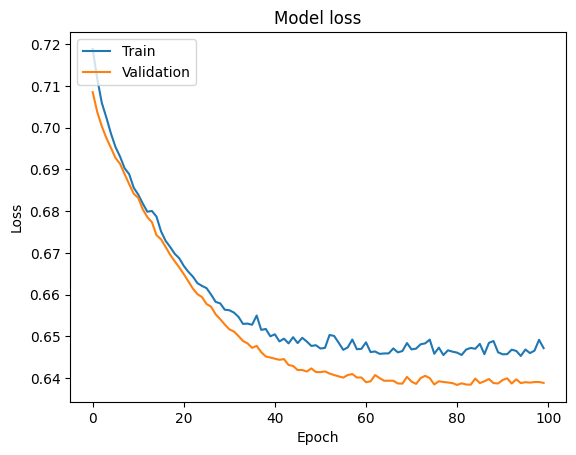

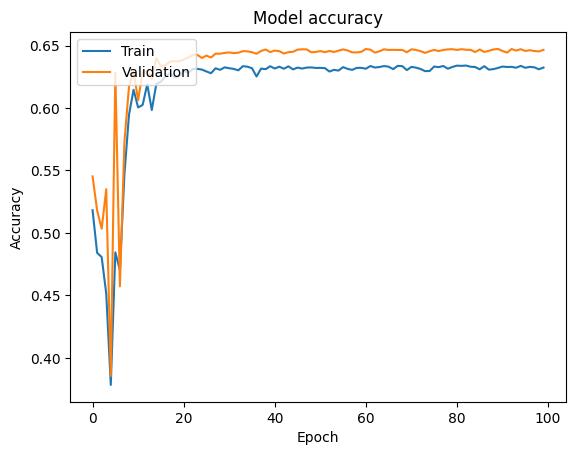

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, None, 10)       │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, None, 1)        │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95 (384.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 64 (260.00 B)

In [ ]:
#// plotting code from google ai https://www.google.com/search?client=firefox-b-1-d&q=plot+tensorflow+model+history
# then modified
def plotModelHistory(history,modelNum = -1):
    plt.subplot(211)
    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Model {modelNum} loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    plt.subplot(212)
    # Plot training & validation accuracy values
    plt.plot(history.history['binary_accuracy'])
    plt.plot(history.history['val_binary_accuracy'])
    plt.title(f'Model {modelNum} accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
plotModelHistory(history)
model.summary()

In [31]:
test_loss, test_acc = model.evaluate(validationODG)
print("test accuracy: "+str(test_acc))

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - binary_accuracy: 0.6121 - loss: 0.6605
test accuracy: 0.6465574502944946


In [32]:
#Make a model that has multpile layers
input1 = tf.keras.layers.Input(shape=(1,), name="z_global")
input2 = tf.keras.layers.Input(shape=(1,), name="x_size")
inputList = [input1, input2]
inputs = tf.keras.layers.Concatenate()(inputList)
stack = tf.keras.layers.Dense(10,activation='relu')(inputs)
stack = tf.keras.layers.Dense(10)(stack)
output = tf.keras.layers.Dense(1,activation='sigmoid')(stack)

model2 = tf.keras.Model(inputs=inputList, outputs=output)

# model.summary()

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
# callbacks=[]
# learningRates = [0.1,0.9,0.6,0.3,0.1,0.03,0.01,0.001,0.0001,0.00001,0.000001]
# callbacks.append(tf.keras.callbacks.LearningRateScheduler(lambda epoch,lr : lr if epoch<5 else lr*np.exp(-0.1)))
# callbacks=[]
history2 = model2.fit(x=trainODG,validation_data=validationODG, callbacks=callbacks,epochs=100)

Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - binary_accuracy: 0.5703 - loss: 0.7038 - val_binary_accuracy: 0.5555 - val_loss: 0.6976
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - binary_accuracy: 0.3864 - loss: 0.7072 - val_binary_accuracy: 0.5676 - val_loss: 0.6912
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - binary_accuracy: 0.5129 - loss: 0.6932 - val_binary_accuracy: 0.5784 - val_loss: 0.6862
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - binary_accuracy: 0.5602 - loss: 0.6859 - val_binary_accuracy: 0.6800 - val_loss: 0.6806
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - binary_accuracy: 0.6732 - loss: 0.6812 - val_binary_accuracy: 0.6857 - val_loss: 0.6752
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - binary_accuracy: 0.6781 - loss: 0.6761 - val_binary_accuracy: 0.7001 - val_loss: 0.6691
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - binary_accuracy: 0.6599 - loss: 0.6698 - val_binary_accuracy: 0.6678 - val_loss: 0.6643
Epoch 

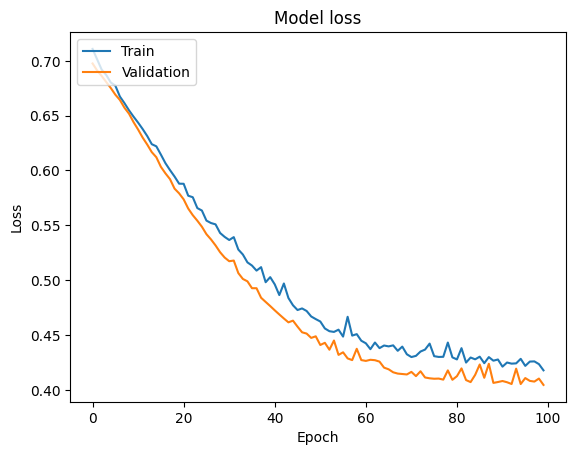

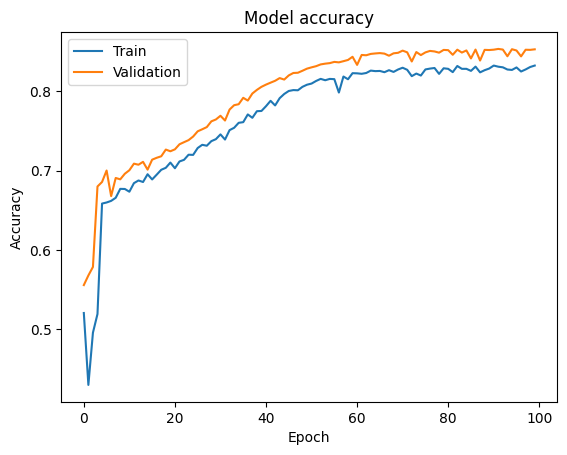

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ z_global            │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ x_size (InputLayer) │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_8       │ (None, 2)         │          0 │ z_global[0][0],   │
│ (Concatenate)       │                   │            │ x_size[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_30 (Dense)    │ (None, 10)        │         30 │ concatenate_8[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_31 (Dense)    │ (None, 10)        │        110 │ dense_30[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_32 (Dense)    │ (None, 1)         │         11 │ dense_31[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 455 (1.78 KB)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 304 (1.19 KB)

In [33]:
plotModelHistory(history2)
model2.summary()


In [37]:
#Make a model that has multpile layers
input1 = tf.keras.layers.Input(shape=(1,), name="z_global")
input2 = tf.keras.layers.Input(shape=(1,), name="x_size")
input3 = tf.keras.layers.Input(shape=(21,), name="x_profile")
input4 = tf.keras.layers.Input(shape=(13,), name="y_profile")
inputList = [input1, input2,input3,input4]
inputs = tf.keras.layers.Concatenate()(inputList)
stack = tf.keras.layers.Dense(10,activation='relu')(inputs)
stack = tf.keras.layers.Dense(10)(stack)
output = tf.keras.layers.Dense(1,activation='sigmoid')(stack)

model3 = tf.keras.Model(inputs=inputList, outputs=output)

# model.summary()

model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
# callbacks=[]
# learningRates = [0.1,0.9,0.6,0.3,0.1,0.03,0.01,0.001,0.0001,0.00001,0.000001]
# callbacks.append(tf.keras.callbacks.LearningRateScheduler(lambda epoch,lr : lr if epoch<5 else lr*np.exp(-0.1)))
# callbacks=[]
history3 = model3.fit(x=trainODG,validation_data=validationODG, callbacks=callbacks,epochs=150)

Epoch 1/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - binary_accuracy: 0.5384 - loss: 3.9075 - val_binary_accuracy: 0.5252 - val_loss: 2.0950
Epoch 2/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - binary_accuracy: 0.5295 - loss: 1.9027 - val_binary_accuracy: 0.5472 - val_loss: 1.2316
Epoch 3/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - binary_accuracy: 0.5522 - loss: 1.1624 - val_binary_accuracy: 0.5614 - val_loss: 0.9333
Epoch 4/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - binary_accuracy: 0.5654 - loss: 0.8937 - val_binary_accuracy: 0.5880 - val_loss: 0.8326
Epoch 5/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - binary_accuracy: 0.5712 - loss: 0.8260 - val_binary_accuracy: 0.5771 - val_loss: 0.7536
Epoch 6/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - binary_accuracy: 0.5667 - loss: 0.7767 - val_binary_accuracy: 0.5617 - val_loss: 0.7507
Epoch 7/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - binary_accuracy: 0.5923 - loss: 0.7286 - val_binary_accuracy: 0.5753 - val_loss: 0.7160
Epoch 

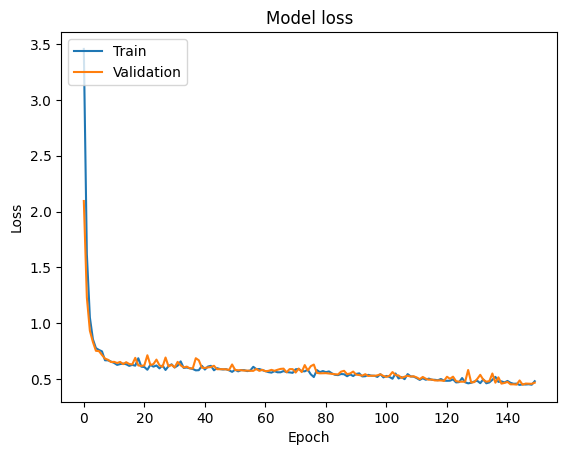

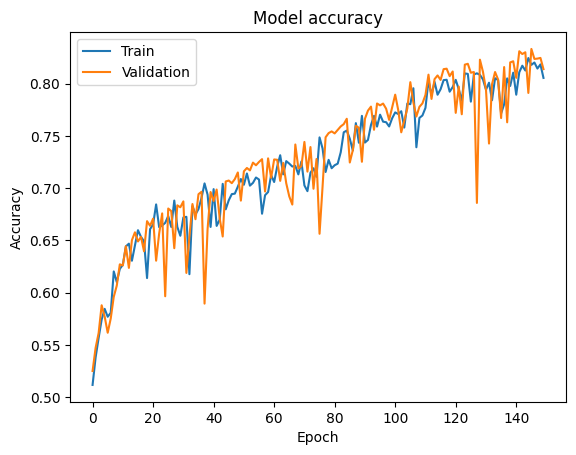

In [38]:
plotModelHistory(history3)

In [39]:
test_loss, test_acc = model.evaluate(validationODG)
print("sequential model validation test accuracy: "+str(test_acc))

test_loss, test_acc = model2.evaluate(validationODG)
print("model2 validation test accuracy: "+str(test_acc))

test_loss, test_acc = model3.evaluate(validationODG)
print("model3 validation test accuracy: "+str(test_acc))

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - binary_accuracy: 0.6121 - loss: 0.6605
sequential model validation test accuracy: 0.6465574502944946
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - binary_accuracy: 0.8150 - loss: 0.4319
model2 validation test accuracy: 0.8531831502914429
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - binary_accuracy: 0.7910 - loss: 0.4698
model3 validation test accuracy: 0.8137552738189697
